In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv
/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading Datasets

In [3]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


As there are very few rows with null values, I ll be dropping them

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.000000,9.998000e+03,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,5003.497499,1.569094e+07,650.529606,38.920287,5.013003,76481.490819,1.530206,0.705541,0.514803,100099.786455,0.203841
std,2886.321275,7.192399e+04,96.633003,10.487986,2.892152,62393.187035,0.581669,0.455822,0.499806,57510.939962,0.402872
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2504.250000,1.562854e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5003.500000,1.569073e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,7502.750000,1.575323e+07,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149395.882500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
y=df['Exited']
y

0        1
1        0
2        1
3        0
5        1
        ..
9997     1
9998     1
9999     1
10000    0
10001    0
Name: Exited, Length: 9998, dtype: int64

RowNumber and CustomerId are of no use for model building. Surname might be(not really sure) but I am not considering it for now

In [9]:
X=df.iloc[:,3:-1]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71
...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78


In [10]:
X['Geography'].value_counts()

Geography
France     5012
Germany    2510
Spain      2476
Name: count, dtype: int64

Assesing the Data

In [11]:
X['HasCrCard']=X['HasCrCard'].astype('category')
X['IsActiveMember']=X['IsActiveMember'].astype('category')
X['Tenure']=X['Tenure'].astype('category')
X['NumOfProducts']=X['NumOfProducts'].astype('category')

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      9998 non-null   int64   
 1   Geography        9998 non-null   object  
 2   Gender           9998 non-null   object  
 3   Age              9998 non-null   float64 
 4   Tenure           9998 non-null   category
 5   Balance          9998 non-null   float64 
 6   NumOfProducts    9998 non-null   category
 7   HasCrCard        9998 non-null   category
 8   IsActiveMember   9998 non-null   category
 9   EstimatedSalary  9998 non-null   float64 
dtypes: category(4), float64(3), int64(1), object(2)
memory usage: 586.6+ KB


In [13]:
X['Age']=X['Age'].astype('int64')

# Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

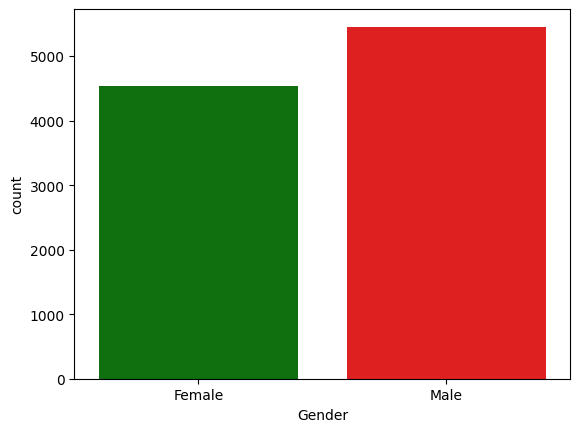

In [14]:
sns.countplot(X,x='Gender',palette=['green','red'])

([<matplotlib.patches.Wedge at 0x7e9350519e10>,
 [Text(-0.004493416455471366, 1.09999082232924, 'France'),
  Text(-0.7688455658923319, -0.7866870380320882, 'Germany'),
  Text(0.7835398348361887, -0.772052671276305, 'Spain')],
 [Text(-0.002450954430257109, 0.5999949939977672, '50.1%'),
  Text(-0.41937030866854463, -0.4291020207447753, '25.1%'),
  Text(0.42738536445610287, -0.4211196388779845, '24.8%')])

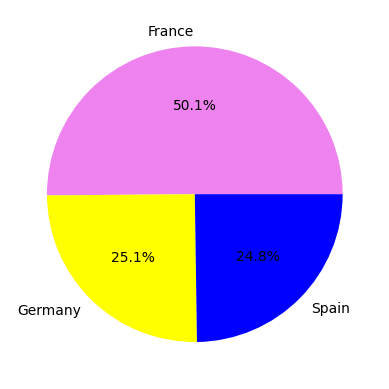

In [15]:
plt.pie(df['Geography'].value_counts(),labels=df['Geography'].value_counts().index,autopct='%1.1f%%',colors=['violet','yellow','blue'])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Tenure', ylabel='count'>

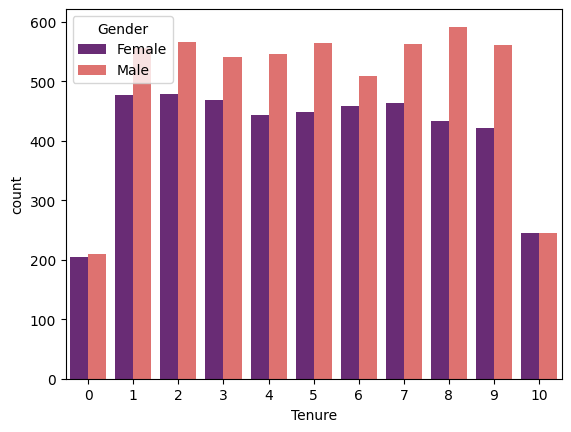

In [16]:
sns.countplot(X,x='Tenure',hue='Gender',palette='magma')

<Axes: xlabel='Tenure', ylabel='count'>

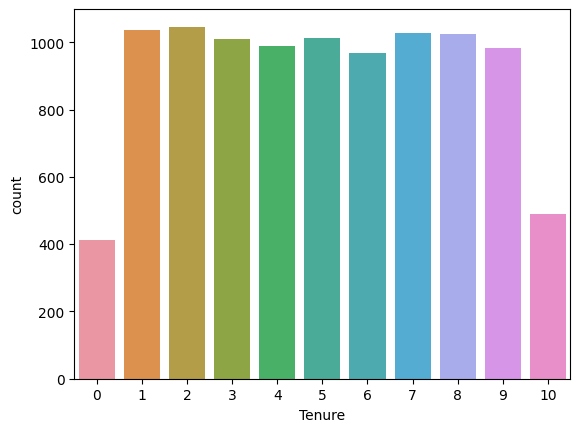

In [17]:
sns.countplot(X,x='Tenure')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='NumOfProducts', ylabel='count'>

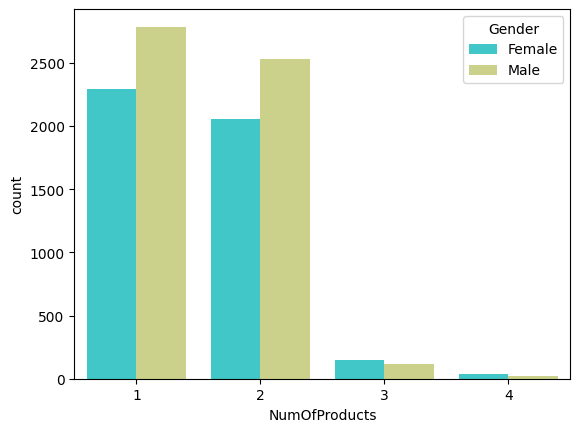

In [18]:
sns.countplot(X,x='NumOfProducts',hue='Gender',palette='rainbow')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='HasCrCard', ylabel='count'>

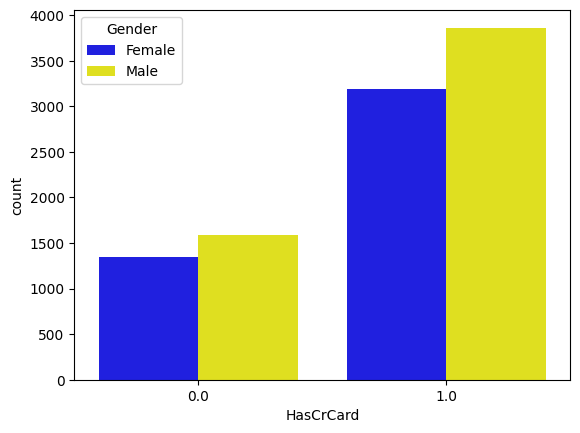

In [19]:
sns.countplot(X,x='HasCrCard',hue='Gender',palette=['blue','yellow'])

In [20]:
df['HasCrCard'].value_counts()

HasCrCard
1.0    7054
0.0    2944
Name: count, dtype: int64

In [21]:
7054/(7054+2944)

0.7055411082216443

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='IsActiveMember', ylabel='count'>

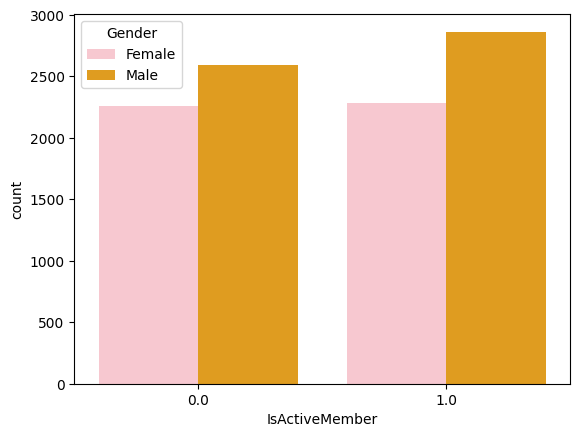

In [22]:
sns.countplot(X,x='IsActiveMember',hue='Gender',palette=['pink','orange'])

In [23]:
df['IsActiveMember'].value_counts()

IsActiveMember
1.0    5147
0.0    4851
Name: count, dtype: int64

In [24]:
5147/(5147+4851)

0.5148029605921184

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

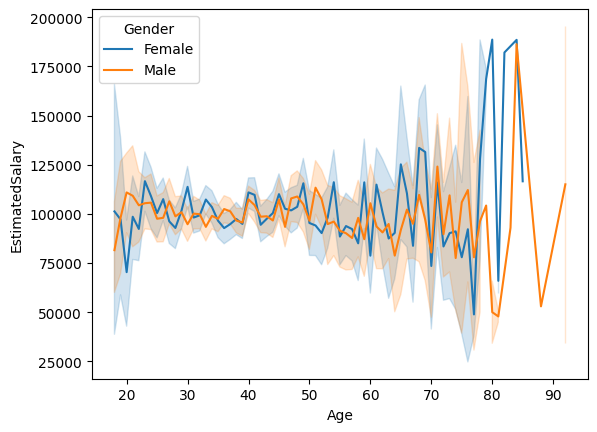

In [25]:
sns.lineplot(X,x='Age',y='EstimatedSalary',hue='Gender')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Age', ylabel='Count'>

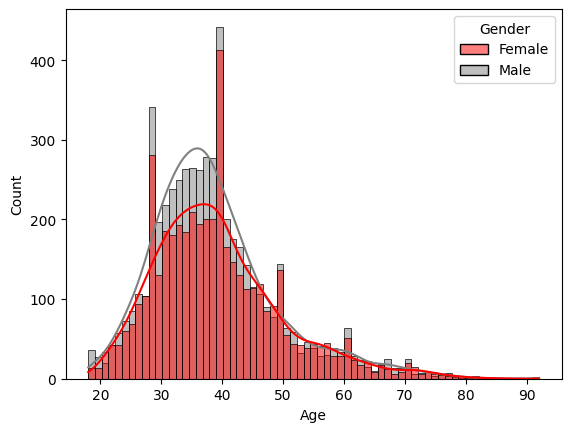

In [26]:
sns.histplot(X,x='Age',hue='Gender',palette=['red','gray'],kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Balance', ylabel='Count'>

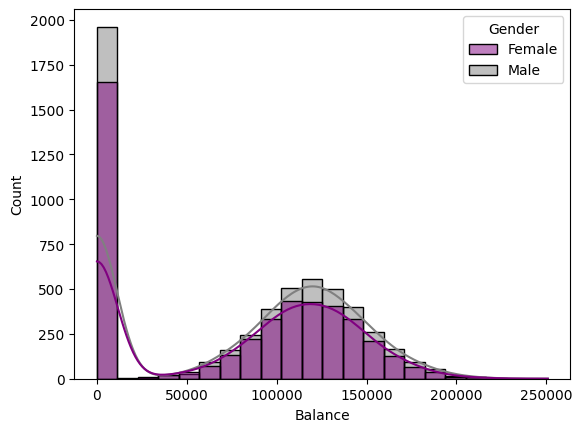

In [27]:
sns.histplot(X,x='Balance',hue='Gender',palette=['purple','gray'],kde=True)

In [28]:
len(df[df['Balance']==0])

3616

In [29]:
len(df['Balance'])

9998

In [30]:
3616/9998

0.3616723344668934

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='CreditScore', ylabel='Count'>

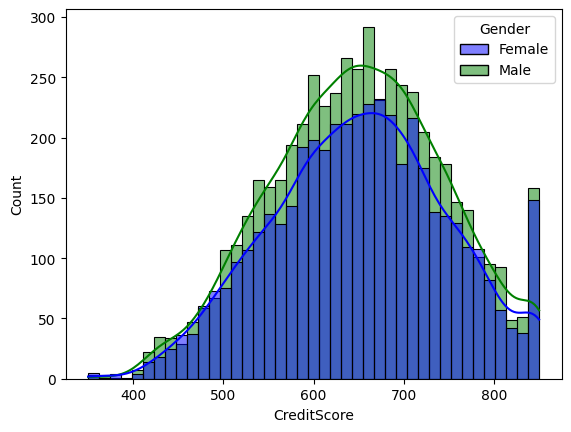

In [31]:
sns.histplot(X,x='CreditScore',hue='Gender',palette=['blue','green'],kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='CreditScore', ylabel='Count'>

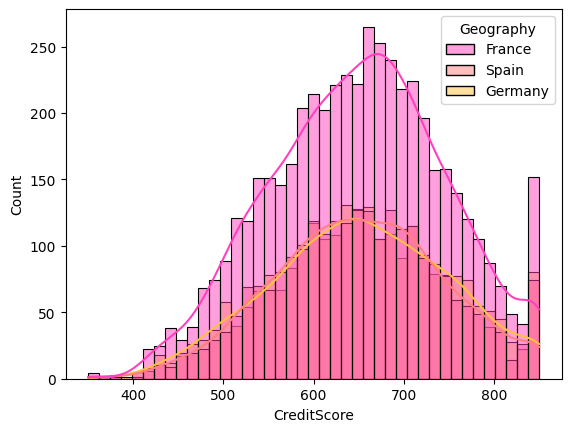

In [32]:
sns.histplot(X,x='CreditScore',hue='Geography',palette='spring',kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='NumOfProducts', ylabel='Age'>

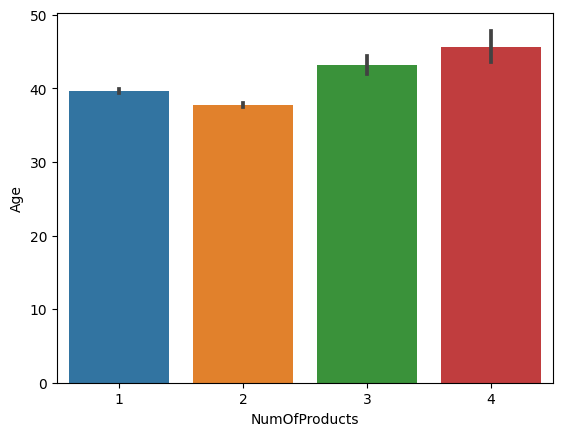

In [33]:
sns.barplot(X,y='Age',x='NumOfProducts')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Tenure', ylabel='Age'>

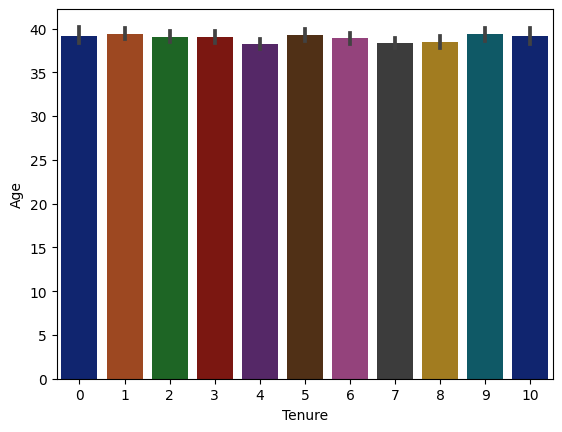

In [34]:
sns.barplot(X,y='Age',x='Tenure',palette='dark')

In [35]:
numerical_cols=['CreditScore','Age','Balance','EstimatedSalary']
object_cols=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']

<Axes: xlabel='CreditScore', ylabel='Geography'>

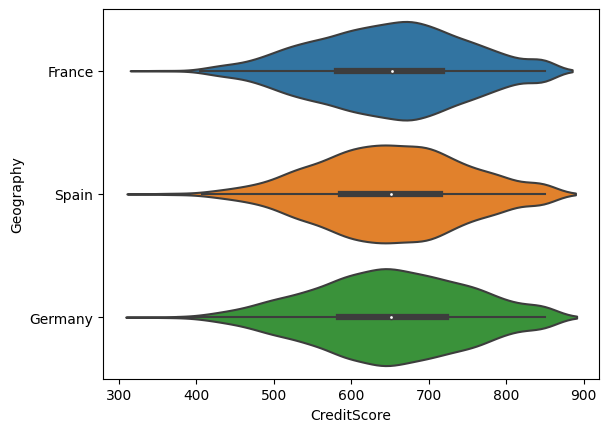

In [36]:
sns.violinplot(X,x='CreditScore',y='Geography')

<Axes: xlabel='Balance', ylabel='Geography'>

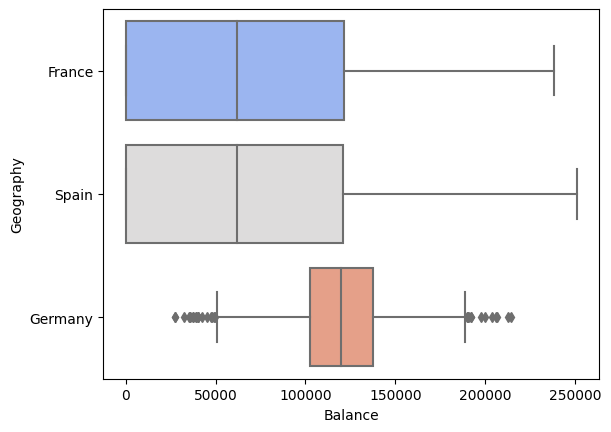

In [37]:
sns.boxplot(X,x='Balance',y='Geography',palette='coolwarm')

<Axes: xlabel='Geography', ylabel='count'>

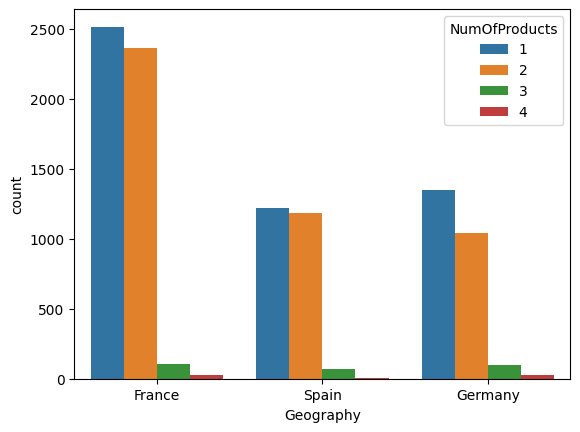

In [38]:
sns.countplot(X,x='Geography',hue='NumOfProducts')

<Axes: xlabel='EstimatedSalary', ylabel='Geography'>

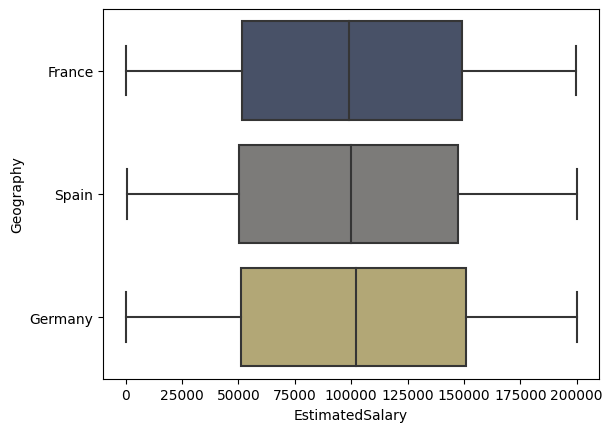

In [39]:
sns.boxplot(X,x='EstimatedSalary',y='Geography',palette='cividis')

Now, Analysing with target column:-

<Axes: xlabel='Exited', ylabel='count'>

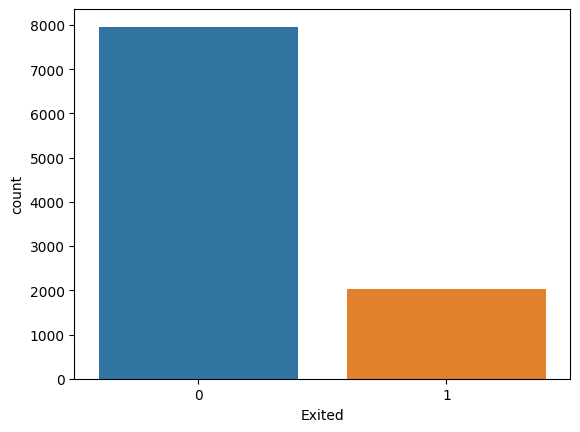

In [40]:
sns.countplot(df,x='Exited')

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      9998 non-null   int64   
 1   Geography        9998 non-null   object  
 2   Gender           9998 non-null   object  
 3   Age              9998 non-null   int64   
 4   Tenure           9998 non-null   category
 5   Balance          9998 non-null   float64 
 6   NumOfProducts    9998 non-null   category
 7   HasCrCard        9998 non-null   category
 8   IsActiveMember   9998 non-null   category
 9   EstimatedSalary  9998 non-null   float64 
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 586.6+ KB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='CreditScore', ylabel='Count'>

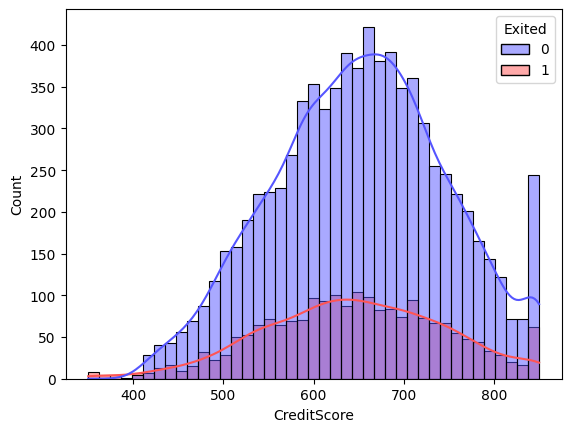

In [42]:
sns.histplot(df,x='CreditScore',hue='Exited',palette='seismic',kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Balance', ylabel='Count'>

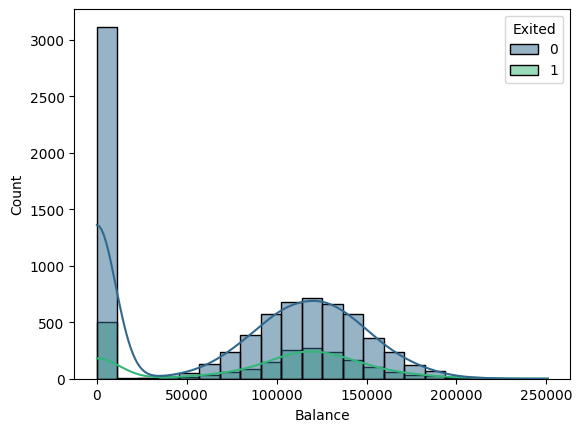

In [43]:
sns.histplot(df,x='Balance',hue='Exited',palette='viridis',kde=True)

<Axes: xlabel='NumOfProducts', ylabel='count'>

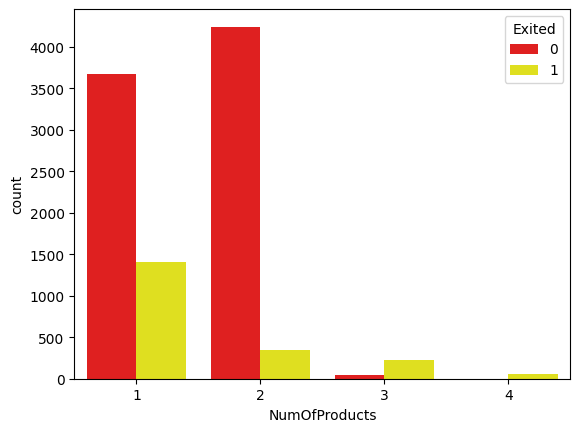

In [44]:
sns.countplot(df,x='NumOfProducts',hue='Exited',palette=['red','yellow'])

<Axes: xlabel='HasCrCard', ylabel='count'>

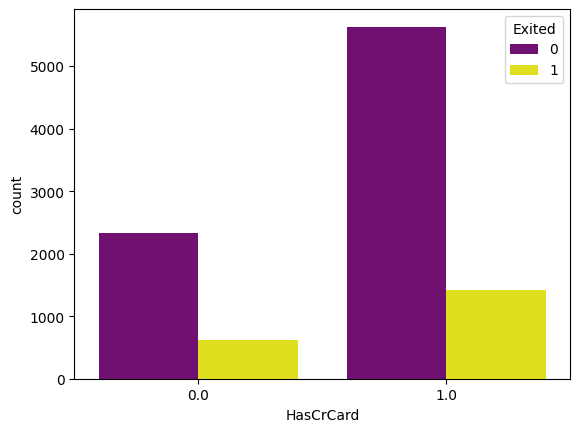

In [45]:
sns.countplot(df,x='HasCrCard',hue='Exited',palette=['purple','yellow'])

<Axes: xlabel='IsActiveMember', ylabel='count'>

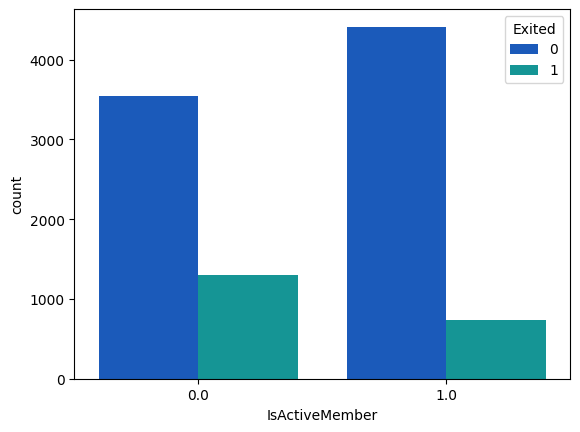

In [46]:
sns.countplot(df,x='IsActiveMember',hue='Exited',palette='winter')

<Axes: xlabel='Gender', ylabel='count'>

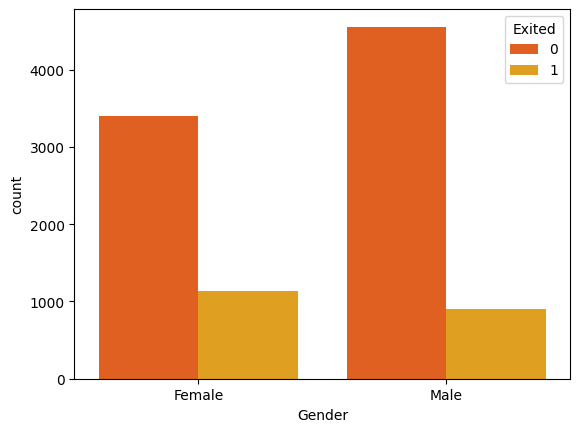

In [47]:
sns.countplot(df,x='Gender',hue='Exited',palette='autumn')

<Axes: xlabel='Geography', ylabel='count'>

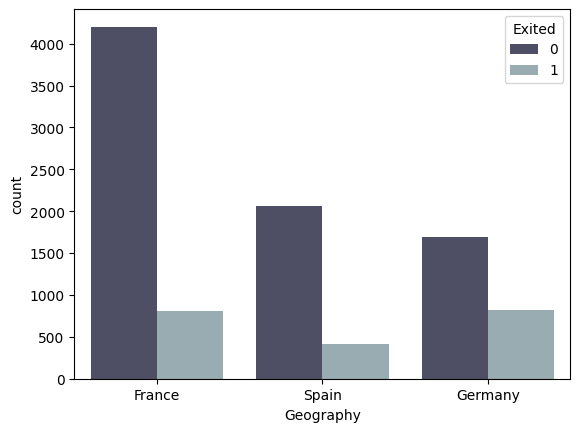

In [48]:
sns.countplot(df,x='Geography',hue='Exited',palette='bone')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Count'>

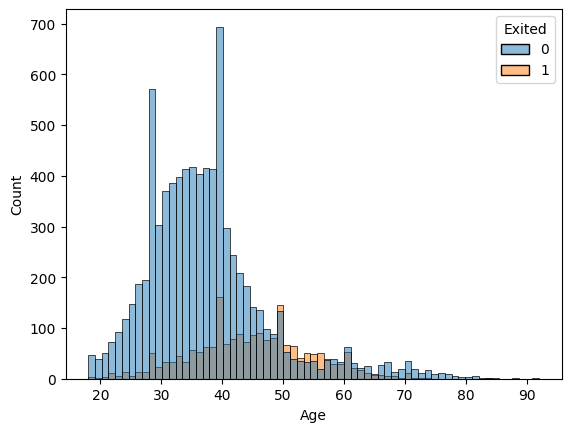

In [49]:
sns.histplot(df,x='Age',hue='Exited')

<Axes: >

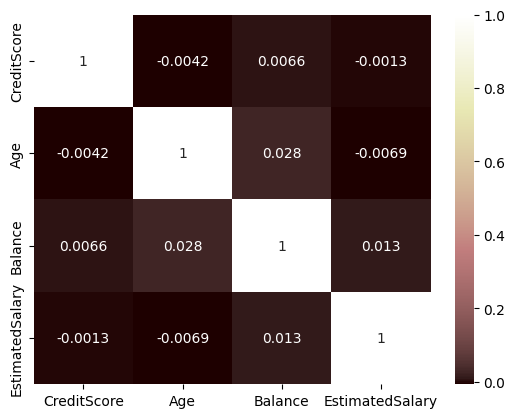

In [50]:
sns.heatmap(X[numerical_cols].corr(),annot=True,cmap='pink')

# Insights
* Men are more in number, while churn rate of females are comparatively higher(very slightly)
* 50% of the people are from France with almost equal proportions from Spain and Germany
* Nearly equal percentage of people have a Tenure of 1-9
* Very Few people have NumOfProducts>2 and among those, women are more. Also nearly all people having products>2 exit
* Around 71% of the people have a Credit Card
* Only 51% of the users are Active
* Most of the people lie under 30-40 Age Group and people above age of 50 tend to exit more
* 36% of people have 0 balance, other 64% have a very normal distribution. Also, people from France and Spain have low Balances comparatively
* Ironically, people from Germany tend to Exit more comparatively
* People having more than 2 products have an age > 40
* Average Credit Score of people is around 650

Drop a Comment if you could find anything more from the above dataset!

# Feature Engineering

Removing people above age of 70 and creating new features

In [51]:
df_copy=df.copy()
df=df[df['Age']<70]

X=df.iloc[:,3:-1]

y=df['Exited']

X['Active_with_cr']=X['HasCrCard']*X['IsActiveMember']
X['Active_with_cr']=X['Active_with_cr'].astype('category')

X['Products_per_year']=round(X['Tenure']/X['NumOfProducts'])
X['Products_per_year']=X['Products_per_year'].astype('int').astype('category')

X['Zero_Balance']=X['Balance'].apply(lambda x: 1 if x==0 else 0)
X['Zero_Balance']=X['Zero_Balance'].astype('category')

X['Old']=X['Age'].apply(lambda x: 1 if x>50 else 0)
X['Old']=X['Old'].astype('category')

test['Active_with_cr']=test['HasCrCard']*test['IsActiveMember']
test['Active_with_cr']=test['Active_with_cr'].astype('category')

test['Products_per_year'] = round(test['Tenure'] / test['NumOfProducts'])
test['Products_per_year'] = test['Products_per_year'].astype('int').astype('category')

test['Zero_Balance'] = test['Balance'].apply(lambda x: 1 if x == 0 else 0)
test['Zero_Balance'] = test['Zero_Balance'].astype('category')

test['Old'] = test['Age'].apply(lambda x: 1 if x > 50 else 0)
test['Old'] = test['Old'].astype('category')


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
numerical_cols=['CreditScore','Age','Balance','EstimatedSalary']
object_cols=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Active_with_cr','Products_per_year','Zero_Balance','Old']

**Scaling**

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [55]:
X_train[numerical_cols]=scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols]=scaler.transform(X_val[numerical_cols])
test[numerical_cols]=scaler.transform(test[numerical_cols])

In [56]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Active_with_cr,Products_per_year,Zero_Balance,Old
1768,1.141637,Spain,Male,-1.083929,1,1.032763,2,0.0,0.0,-1.447339,0.0,0,0,0
4627,-0.467693,France,Male,0.069127,7,-1.228755,1,0.0,1.0,0.339495,0.0,7,1,0
1474,1.089723,Germany,Female,-0.874282,6,1.244146,2,0.0,1.0,-0.642852,0.0,3,0,0
106,-0.706496,Germany,Male,-0.664636,1,0.197353,1,1.0,1.0,-1.555402,1.0,1,0,0
328,0.217570,Germany,Male,-0.350166,1,1.093858,1,1.0,1.0,1.373930,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5825,-0.446927,Spain,Female,2.480061,8,0.503072,1,1.0,1.0,-1.324252,1.0,8,0,1
5274,-0.291185,France,Male,0.488420,8,-1.228755,2,1.0,0.0,0.014759,0.0,4,1,0
5476,1.847665,Spain,Male,0.907712,1,0.533092,2,1.0,0.0,-0.280097,0.0,0,0,0
874,-0.052382,France,Female,-0.035697,5,0.397654,2,0.0,1.0,-1.653433,0.0,2,0,0


**Encoding**

In [57]:
categorical_cols=object_cols

In [58]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(X[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])
test[encoded_cols] = encoder.transform(test[categorical_cols])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
categorical_cols

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Active_with_cr',
 'Products_per_year',
 'Zero_Balance',
 'Old']

In [60]:
X_train.drop(columns=categorical_cols,inplace=True)
X_val.drop(columns=categorical_cols,inplace=True)

In [61]:
X_train

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Products_per_year_5,Products_per_year_6,Products_per_year_7,Products_per_year_8,Products_per_year_9,Products_per_year_10,Zero_Balance_0,Zero_Balance_1,Old_0,Old_1
1768,1.141637,-1.083929,1.032763,-1.447339,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4627,-0.467693,0.069127,-1.228755,0.339495,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1474,1.089723,-0.874282,1.244146,-0.642852,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
106,-0.706496,-0.664636,0.197353,-1.555402,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
328,0.217570,-0.350166,1.093858,1.373930,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5825,-0.446927,2.480061,0.503072,-1.324252,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5274,-0.291185,0.488420,-1.228755,0.014759,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5476,1.847665,0.907712,0.533092,-0.280097,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
874,-0.052382,-0.035697,0.397654,-1.653433,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<Axes: >

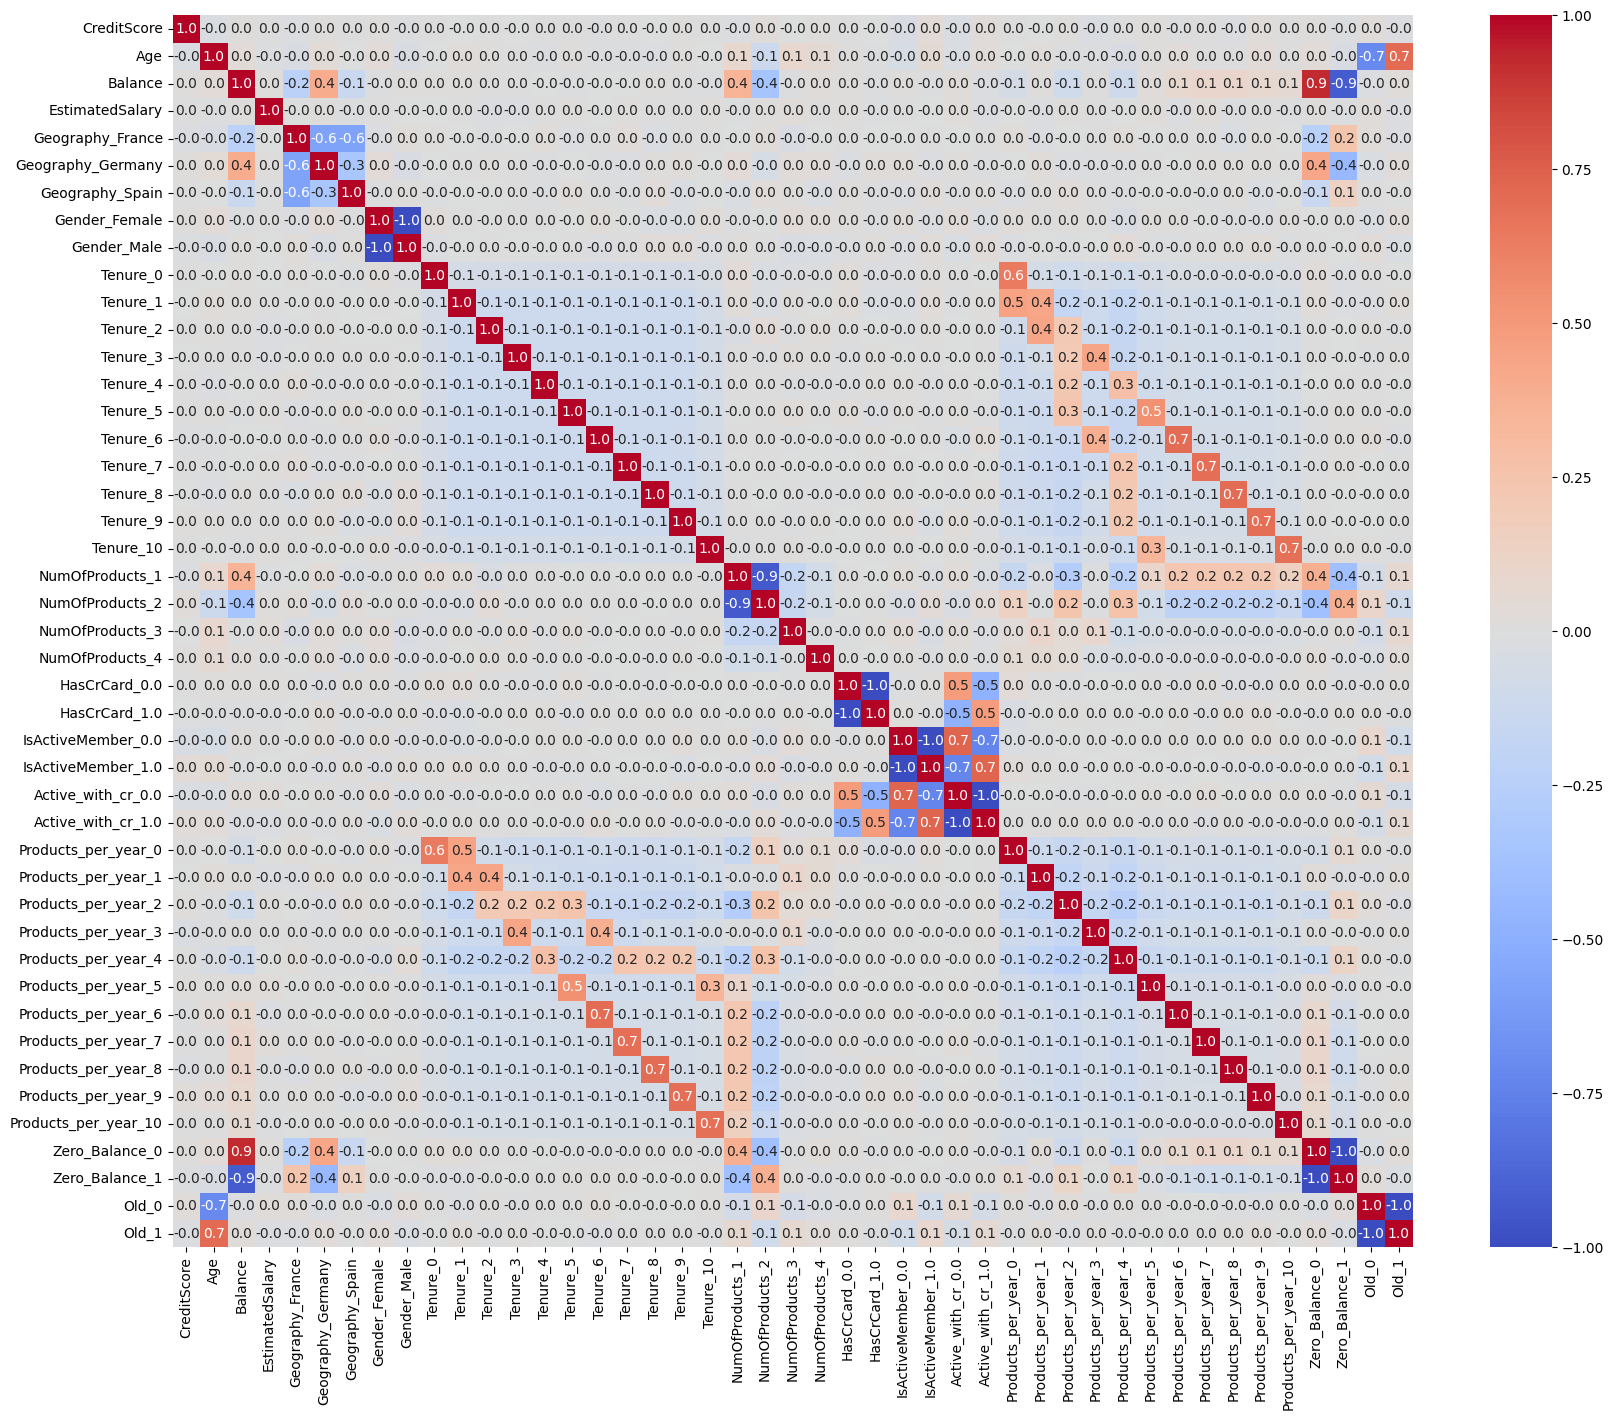

In [62]:
plt.figure(figsize=(20, 16))
sns.heatmap(X_train.corr(), annot=True, fmt=".1f", cmap='coolwarm')

# Modelling

In [63]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [64]:
model = xgb.XGBClassifier(random_state=42,n_jobs=-1)

In [65]:
params={
    "learning_rate":[0.05,0.1,0.2],
    "max_depth":[4,6,8,16],
    "n_estimators":[50,100,200,400],
    "subsample":[0.2,0.4,0.6,0.8],
    "gamma": [0, 0.25, 1.0]
}

In [66]:
# grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)

In [67]:
# grid_search.best_params_

In [68]:
# grid_search.best_score_

In [69]:
# grid_search.best_estimator_

**Final Model**

In [70]:
model = xgb.XGBClassifier(
    random_state=42,n_jobs=-1,
    learning_rate=0.05,
    max_depth=4,
    n_estimators=100,
    subsample=0.6,
)

In [71]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [72]:
val_pred=model.predict(X_val)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(val_pred,y_val)

0.8538071065989847

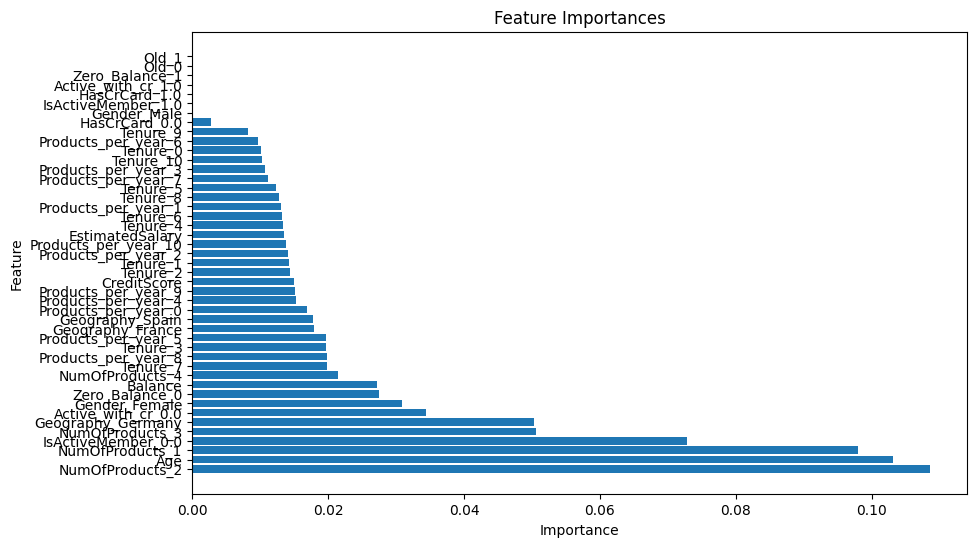

In [74]:
feature_importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

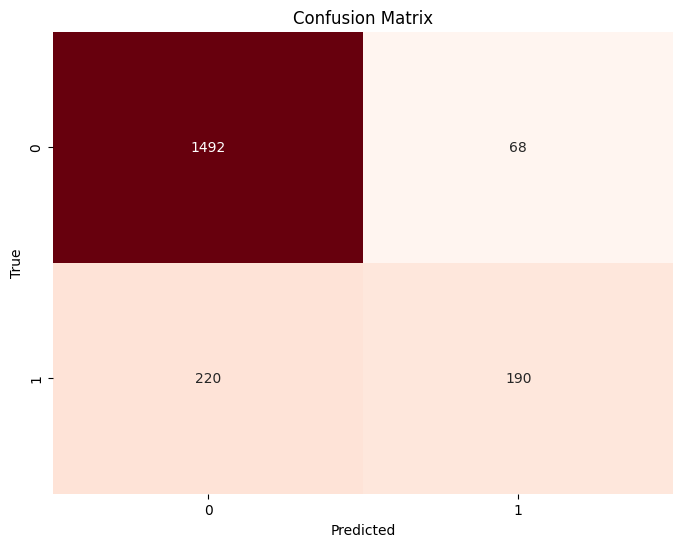

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cf = confusion_matrix(y_val, val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [76]:
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1560
           1       0.74      0.46      0.57       410

    accuracy                           0.85      1970
   macro avg       0.80      0.71      0.74      1970
weighted avg       0.84      0.85      0.84      1970



In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=29,solver='saga',max_iter=500)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=29, solver='saga')

In [78]:
lr_pred=lr.predict(X_val)
accuracy_score(lr_pred,y_val)

0.8446700507614213

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=29,n_jobs=-1,n_estimators=500,max_depth=13)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=13, n_estimators=500, n_jobs=-1,
                       random_state=29)

In [80]:
rf_pred=rf.predict(X_val)
accuracy_score(rf_pred,y_val)

0.8548223350253807

# Stacking

In [81]:
from sklearn.ensemble import StackingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
estimators = [
    ('xgb', xgb.XGBClassifier(
    random_state=42,n_jobs=-1,
    learning_rate=0.05,
    max_depth=4,
    n_estimators=100,
    subsample=0.6,
)),
    ('model_svc', SVC(random_state=42,C=1,kernel='rbf',degree=2)),
    ('rf',RandomForestClassifier(criterion='gini',max_depth=13,random_state=29,n_jobs=-1,n_estimators=500)),
    ('gb',GradientBoostingClassifier(random_state=42,max_depth=3,criterion='friedman_mse',subsample=0.4,n_estimators=100,learning_rate=0.01,loss='log_loss',min_samples_split=6)),
 ]
clf=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(random_state=29,solver='saga',max_iter=500,n_jobs=-1))

In [82]:
clf.fit(X_train,y_train)
val_pred_stack=clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(val_pred_stack,y_val)

0.8573604060913705

In [83]:
test=test.iloc[:,3:]
test.drop(columns=categorical_cols,inplace=True)
test

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Products_per_year_5,Products_per_year_6,Products_per_year_7,Products_per_year_8,Products_per_year_9,Products_per_year_10,Zero_Balance_0,Zero_Balance_1,Old_0,Old_1
0,-0.664965,-1.608045,-1.228755,1.061235,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.342163,0.802889,-1.228755,-0.471890,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.061829,-0.454989,-1.228755,0.678166,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.321398,-0.245343,-1.228755,0.245582,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.058574,-0.035697,0.715677,0.687683,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,-0.831089,-0.979106,0.632876,0.837768,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
110019,-0.779176,-0.245343,1.625952,-0.998393,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
110020,0.643264,-0.769459,-1.228755,-1.447339,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
110021,0.612115,-0.664636,-1.228755,1.023783,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [84]:
y_pred_final=clf.predict(test)
y_pred_final

array([0, 1, 0, ..., 0, 0, 0])

# Submission

In [85]:
submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
submission.drop(columns=['Exited'],inplace=True)
submission

,id
0,165034
1,165035
2,165036
3,165037
4,165038
...,...
110018,275052
110019,275053
110020,275054
110021,275055


In [86]:
ans = model.predict_proba(test)[:, 1]
ans

array([0.02678652, 0.7133158 , 0.02607793, ..., 0.02609722, 0.16629614,
       0.13602792], dtype=float32)

In [87]:
submission['Exited'] = ans
submission.head()

,id,Exited
0,165034,0.026787
1,165035,0.713316
2,165036,0.026078
3,165037,0.163850
4,165038,0.297092


In [88]:
submission.to_csv("submission.csv", index=False)
submission

,id,Exited
0,165034,0.026787
1,165035,0.713316
2,165036,0.026078
3,165037,0.163850
4,165038,0.297092
...,...,...
110018,275052,0.052618
110019,275053,0.164390
110020,275054,0.026097
110021,275055,0.166296
